In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import datetime
from datetime import date
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv('customer_data.csv')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.shape

(2240, 29)

In [6]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are missing values in income

In [7]:
#To remove the NA values
data = data.dropna()


In [8]:
data.shape

(2216, 29)

In [9]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
data.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [11]:
data=data.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

"Z_CostContact" and "Z_Revenue" have same value in all the rows that's why , they are not going to contribute anything in the model building. So we can drop them

# 1.Analysis On Education Variable.

In [12]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

# 2.Analysis On Marital Status Variable.

In [13]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

# 3.Analysis On "MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds" Variable.

In [14]:
# Combining different dataframe into a single column to reduce the number of dimension

data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [15]:
data['Expenses'].describe()

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: Expenses, dtype: float64

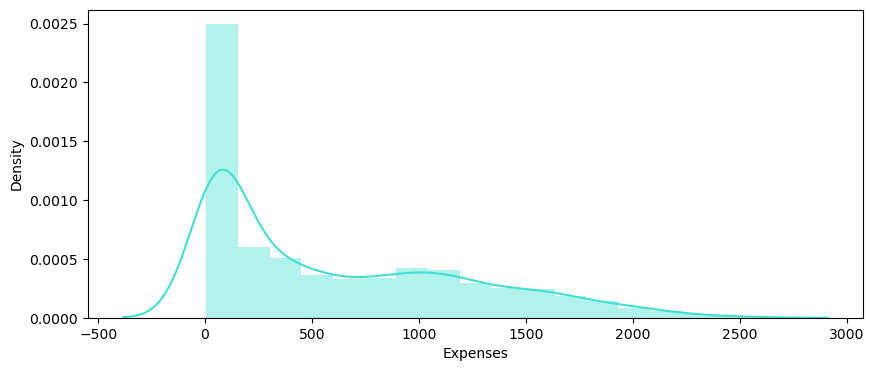

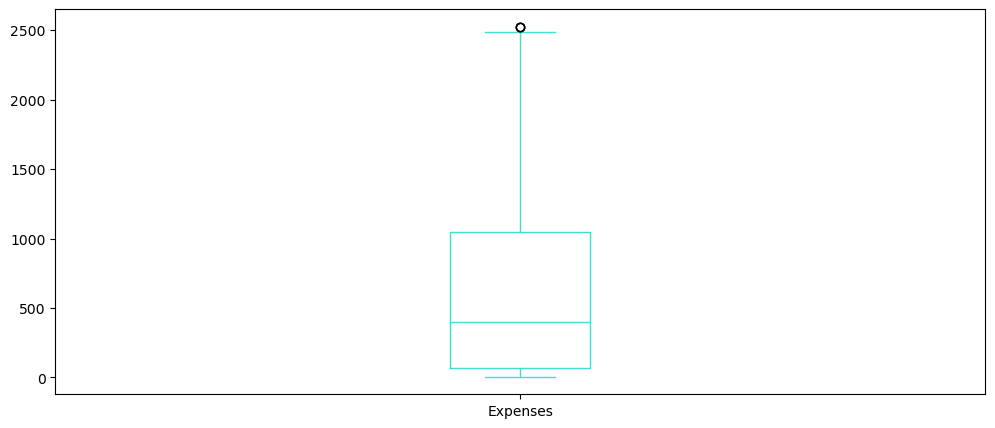

In [16]:
plt.figure(figsize=(10,4))
sns.distplot(data["Expenses"],color = 'turquoise')
plt.show()
data["Expenses"].plot.box(figsize=(12,5),color='turquoise')
plt.show()

# 4.Analysis on "AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5" Variable

In [17]:
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4']

In [18]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "TotalAcceptedCmp"
print("Unique categories present in the TotalAcceptedCmp:",data['TotalAcceptedCmp'].value_counts())
print("\n")

Unique categories present in the TotalAcceptedCmp: 0    1815
1     316
2      72
3      13
Name: TotalAcceptedCmp, dtype: int64




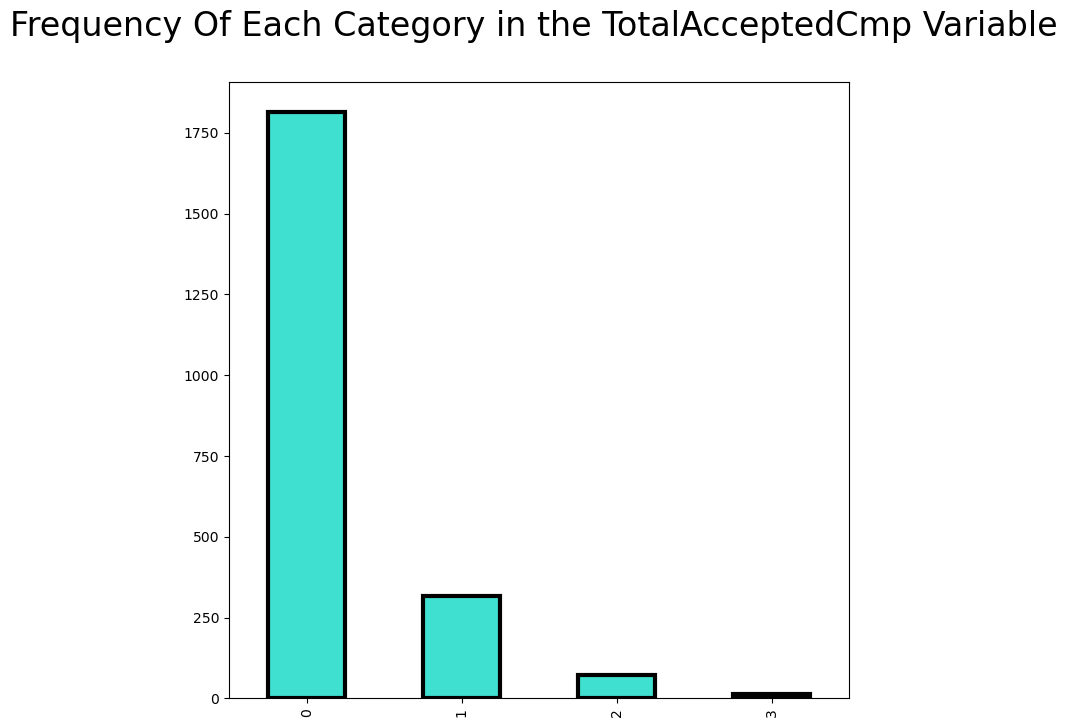

In [19]:
#VISUALIZING THE "TotalAcceptedCmp"


plt.figure(figsize=(8,8))
data['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=24)
plt.show()

# 5.Analysis on "NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases" Variable.

In [20]:
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']
data['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2, 16, 15,  5, 26,  9, 13, 12, 43, 17,
       20, 14, 11, 18, 28,  7, 24,  4, 29, 23, 27, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [21]:
data[['NumTotalPurchases']]

,NumTotalPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [22]:
data['NumTotalPurchases'].describe()

count    2216.000000
mean       14.880866
std         7.670957
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

In [23]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,0,0,0,0,0,0,1,1617,0,25
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,0,0,0,0,0,0,0,27,0,6
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,0,0,0,0,0,0,0,776,0,21
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,0,0,0,0,0,0,0,53,0,8
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,0,0,0,0,0,0,0,422,0,19


In [24]:
#ADDING A COLUMN "customer_Age" IN THE DATAFRAME....
data['Customer_Age'] = (pd.Timestamp('now').year) - data['Year_Birth']

Converting the Year_Birth to customer_Age

In [25]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,0,0,0,0,0,1,1617,0,25,66
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,0,0,0,0,0,0,27,0,6,69
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,0,0,0,0,0,0,776,0,21,58
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,0,0,0,0,0,0,53,0,8,39
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,0,0,0,0,0,0,422,0,19,42


In [26]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data=data.drop(columns=col_del,axis=1)

In [27]:
data.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,Graduation,Single,58138.0,04/09/12,58,0,1,1617,0,25,66
1,Graduation,Single,46344.0,08/03/14,38,0,0,27,0,6,69
2,Graduation,Together,71613.0,21/08/13,26,0,0,776,0,21,58
3,Graduation,Together,26646.0,10/02/14,26,0,0,53,0,8,39
4,PhD,Married,58293.0,19/01/14,94,0,0,422,0,19,42


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2216 non-null   object 
 1   Marital_Status     2216 non-null   object 
 2   Income             2216 non-null   float64
 3   Dt_Customer        2216 non-null   object 
 4   Recency            2216 non-null   int64  
 5   Complain           2216 non-null   int64  
 6   Response           2216 non-null   int64  
 7   Expenses           2216 non-null   int64  
 8   TotalAcceptedCmp   2216 non-null   int64  
 9   NumTotalPurchases  2216 non-null   int64  
 10  Customer_Age       2216 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 207.8+ KB


# The number of days the customers started to shop in the store relative to the last recorded date

In [29]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

In [30]:
data.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,Graduation,Single,58138.0,2012-04-09,58,0,1,1617,0,25,66
1,Graduation,Single,46344.0,2014-08-03,38,0,0,27,0,6,69
2,Graduation,Together,71613.0,2013-08-21,26,0,0,776,0,21,58
3,Graduation,Together,26646.0,2014-10-02,26,0,0,53,0,8,39
4,PhD,Married,58293.0,2014-01-19,94,0,0,422,0,19,42


In [31]:
data['Customer_Age'].describe()

count    2216.000000
mean       54.179603
std        11.985554
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Customer_Age, dtype: float64

In [32]:
data.drop(['Dt_Customer','Recency','Complain','Response'],axis=1,inplace=True)

In [33]:
data.head()

,Education,Marital_Status,Income,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,Graduation,Single,58138.0,1617,0,25,66
1,Graduation,Single,46344.0,27,0,6,69
2,Graduation,Together,71613.0,776,0,21,58
3,Graduation,Together,26646.0,53,0,8,39
4,PhD,Married,58293.0,422,0,19,42


In [34]:
data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [35]:
data['Customer_Age'].describe()

count    2216.000000
mean       54.179603
std        11.985554
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Customer_Age, dtype: float64

In [36]:
data = data[data['Customer_Age'] < 90]
data = data[data['Income'] < 300000]

In [37]:
data.shape

(2212, 7)

In [38]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [39]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [40]:
scaler = StandardScaler()
scaler.fit(data)
scale_data = pd.DataFrame(scaler.transform(data),columns= data.columns )
print("All features are now scaled")

All features are now scaled


In [41]:
data.head()

,Education,Marital_Status,Income,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,2,4,58138.0,1617,0,25,66
1,2,4,46344.0,27,0,6,69
2,2,5,71613.0,776,0,21,58
3,2,5,26646.0,53,0,8,39
4,4,3,58293.0,422,0,19,42


In [42]:
from sklearn.metrics import silhouette_score

def calculate_silhouette_scores(data):
    silhouette_score_lst = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_score_lst.append(silhouette_score(data, cluster_labels))
    return silhouette_score_lst

# Call the function with your data 'X'
silhouette_scores = calculate_silhouette_scores(data)


In [43]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scale_data)
    inertia.append(kmeans.inertia_)

In [44]:
silhouette_scores

[0.6062003877103228,
 0.5412713900026214,
 0.5300267821180229,
 0.5372770608914588,
 0.5386906105583928,
 0.5214160751992144,
 0.5134921427651946,
 0.5200331266855737,
 0.5227358858364117]

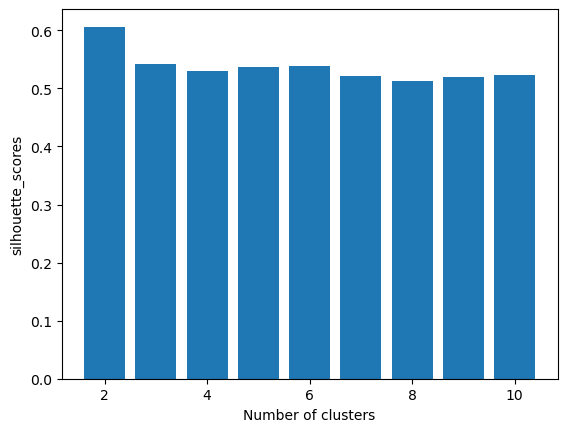

In [45]:
# plotting
k = [2,3,4,5,6,7,8,9,10]
plt.bar(k,silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_scores")
plt.show()

***highest value of bar from given clusters values will be selected***

***selecting number of clusters = 2***

In [46]:
# Based on the Elbow Method, choose the optimal K value (where inertia starts to level off)
k_optimal = 2

In [47]:
df = data.copy()

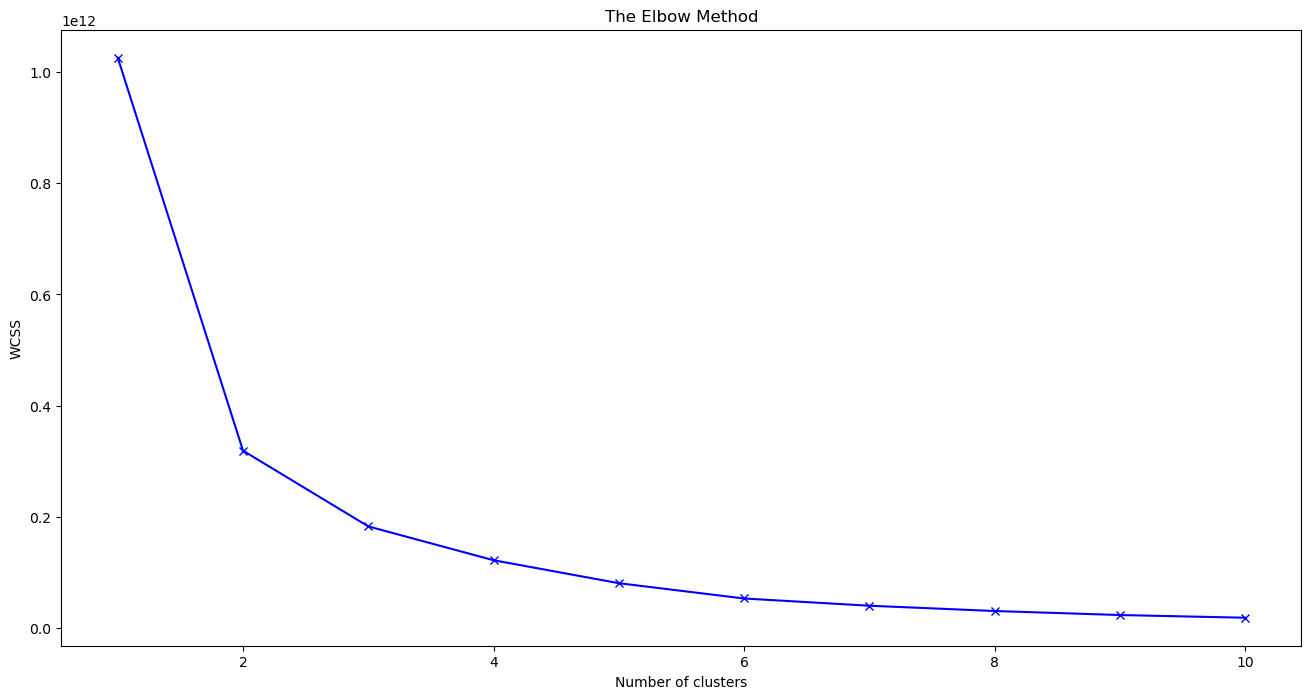

In [48]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=2, random_state=42).fit(df)
pred=kmeans.predict(df)


# Appending those cluster value into main dataframe (without standard-scalar)

df['cluster_Kmeans'] = pred + 1

In [50]:
df.head()


,Education,Marital_Status,Income,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,cluster_Kmeans
0,2,4,58138.0,1617,0,25,66,2
1,2,4,46344.0,27,0,6,69,1
2,2,5,71613.0,776,0,21,58,2
3,2,5,26646.0,53,0,8,39,1
4,4,3,58293.0,422,0,19,42,2


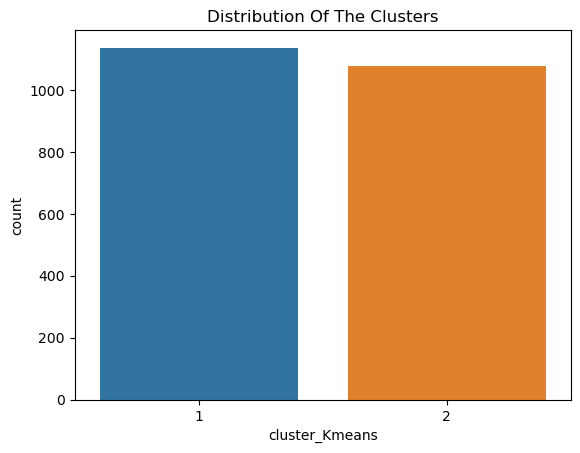

In [51]:
sns.countplot(x=df["cluster_Kmeans"])
plt.title("Distribution Of The Clusters")
plt.show()

# PCA with Agglomerative clustering

In [52]:
data.head()

,Education,Marital_Status,Income,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,2,4,58138.0,1617,0,25,66
1,2,4,46344.0,27,0,6,69
2,2,5,71613.0,776,0,21,58
3,2,5,26646.0,53,0,8,39
4,4,3,58293.0,422,0,19,42


In [53]:
df_1 = data.copy()

In [54]:
df_1.head()

,Education,Marital_Status,Income,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,2,4,58138.0,1617,0,25,66
1,2,4,46344.0,27,0,6,69
2,2,5,71613.0,776,0,21,58
3,2,5,26646.0,53,0,8,39
4,4,3,58293.0,422,0,19,42


In [55]:
from sklearn.decomposition import PCA
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(df_1)
PCA_ds = pd.DataFrame(pca.transform(df_1), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-2.740099e-12,21532.579252,-50229.739835,-16730.878030,-590.359651,16540.956340,110399.892046
col2,2212.0,-9.986145e-14,367.189667,-2221.294477,-206.729366,37.046700,225.132571,2950.774090
col3,2212.0,-1.402936e-15,11.455230,-27.862862,-9.027200,0.542763,8.160155,29.490797


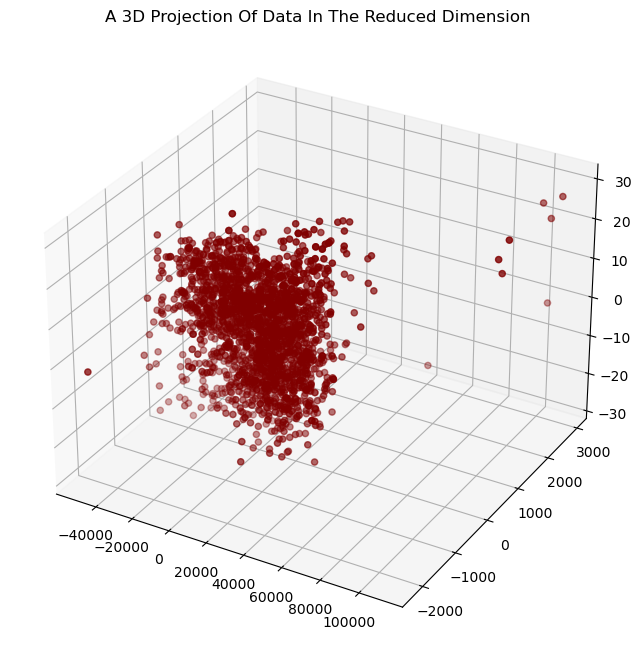

In [56]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")

plt.show()

In [57]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

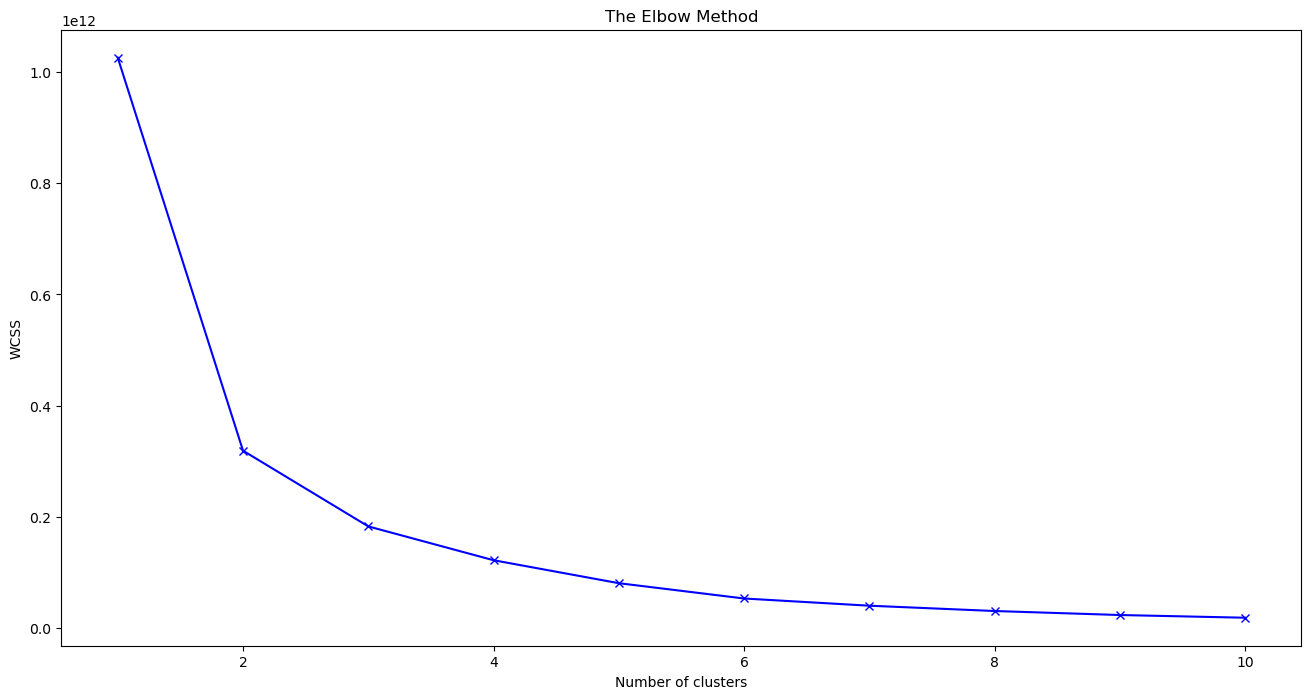

In [58]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
df_1["Cluster_Agglo"]= yhat_AC + 1

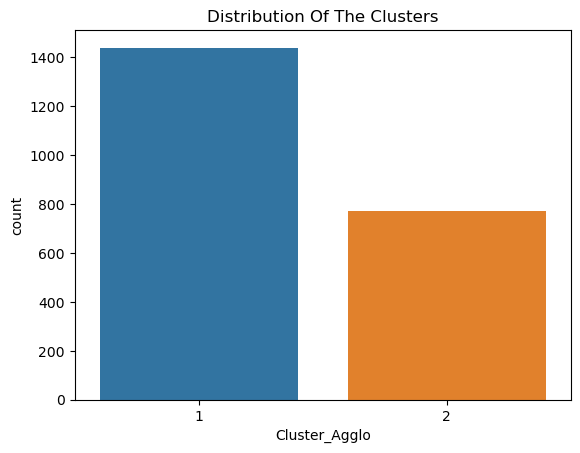

In [60]:
sns.countplot(x=df_1["Cluster_Agglo"])
plt.title("Distribution Of The Clusters")
plt.show()

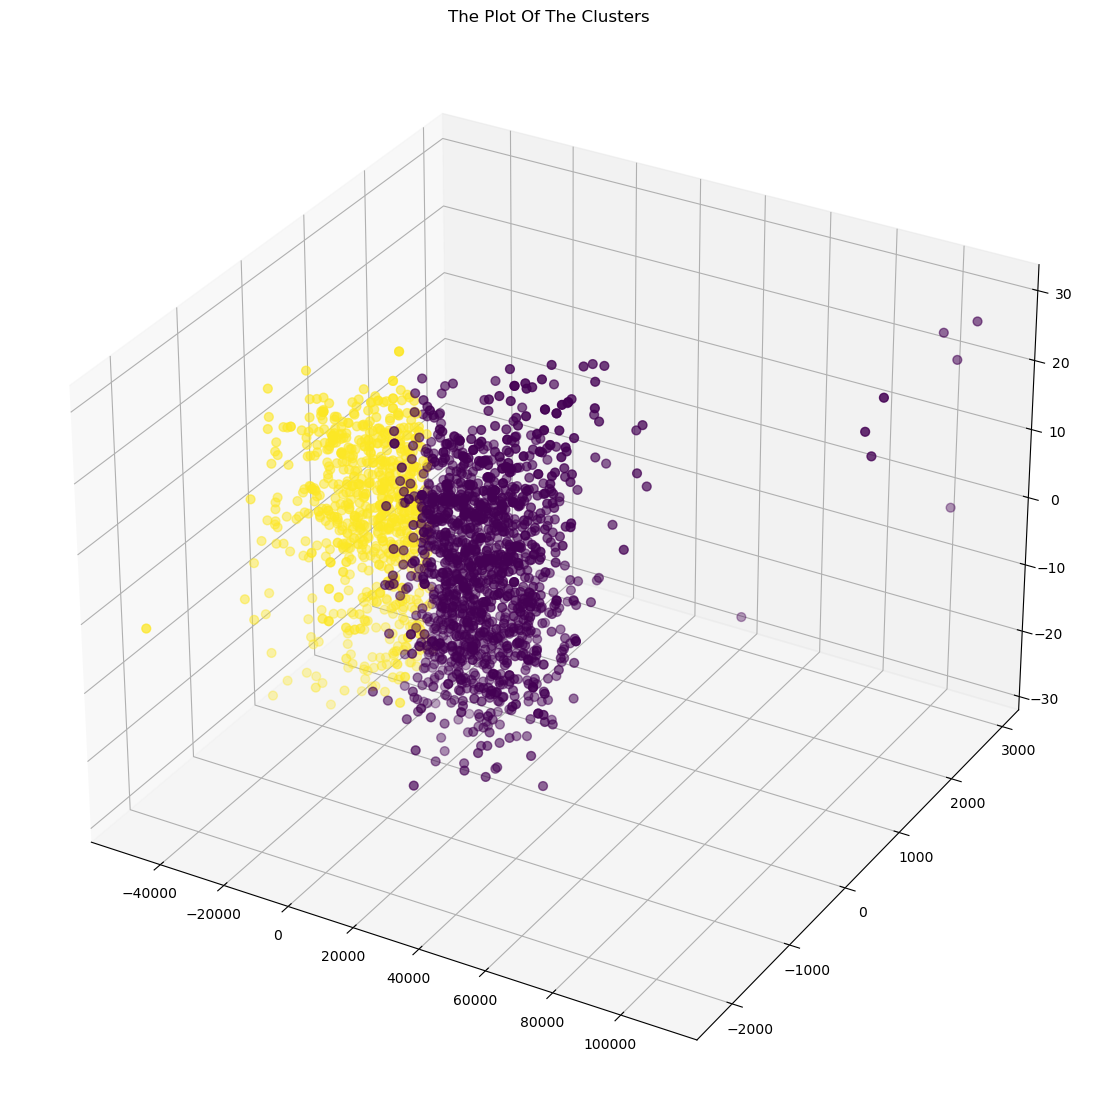

In [61]:
#Plotting the clusters
fig = plt.figure(figsize=(16,14))
ax = plt.subplot(111, projection='3d', label="bla")

ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")

plt.show()